imports

In [207]:
#imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [208]:
#daset
df=pd.read_csv('./diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [209]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [210]:
df.shape

(768, 9)

In [211]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

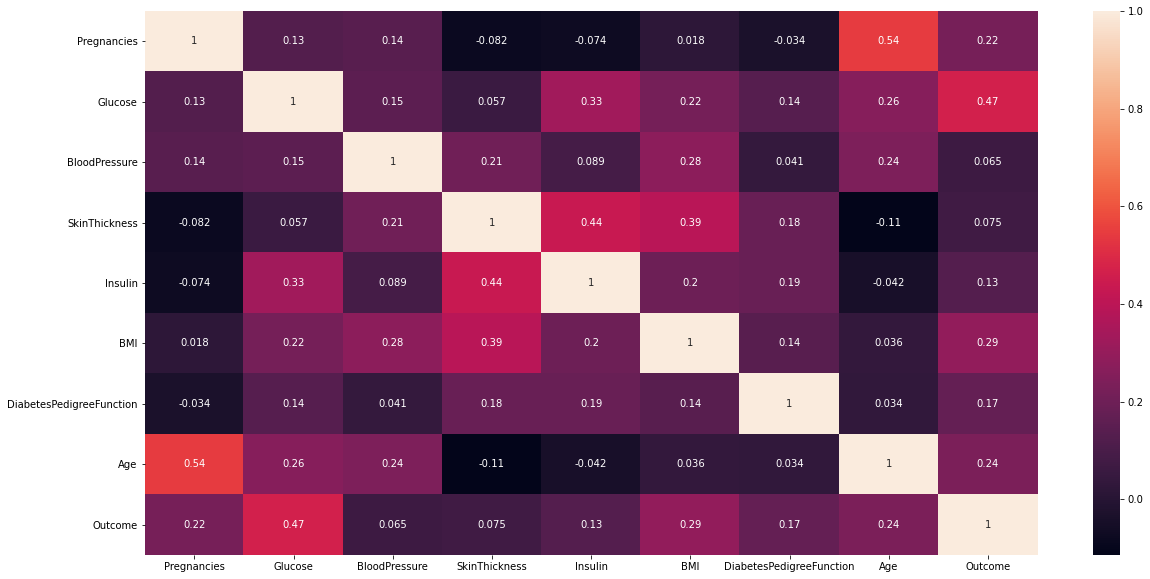

In [212]:
correlation=df.corr()
fig=plt.figure(figsize=(20,10))
ax=sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.show()

observont les donnees

In [213]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [215]:
print('numerical features',df.select_dtypes(include='number').columns)
print('categorical features',df.select_dtypes(exclude='number').columns)


numerical features Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
categorical features Index([], dtype='object')


In [216]:

print('Pregnancies:\n',df.Pregnancies.unique())
print('\n*******************************\n')
print('Glucose:\n',df.Glucose.unique())
print('\n*******************************\n')
print('BloodPressure:\n',df.BloodPressure.unique())
print('\n*******************************\n')
print('SkinThickness:\n',df.SkinThickness.unique())
print('\n*******************************\n')
print('Insulin:\n',df.Insulin.unique())
print('\n*******************************\n')
print('BMI:\n',df.BMI.unique())
print('\n*******************************\n')
print('DiabetesPedigreeFunction:\n',df.DiabetesPedigreeFunction.unique())
print('\n*******************************\n')
print('Age:\n',df.Age.unique())
print('\n*******************************\n')
print('Outcome:\n',df.Outcome.unique())


Pregnancies:
 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

*******************************

Glucose:
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

*******************************

BloodPressure:
 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

*******************************

SkinThickness:
 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 3

Missing values

In [217]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

outliers

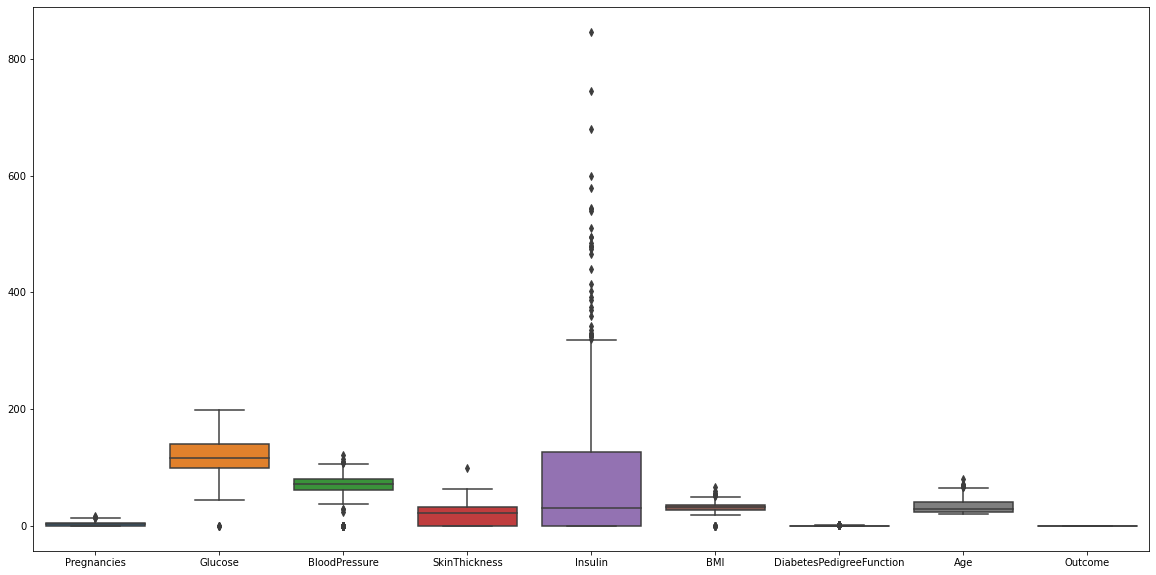

In [218]:
fig=plt.figure(figsize=(20,10))
ax= sns.boxplot(data=df)  

In [219]:
def Outliers (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    IQR=q3-q1
    outliers = column[((column<(q1-1.5*IQR)) | (column>(q3+1.5*IQR)))]
    return outliers

print('\noutliers Pregnancies')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Pregnancies)))
print('\nValeurs uniques:\n',Outliers(df.Pregnancies).unique())
print('\nValues count:\n',Outliers(df.Pregnancies).value_counts())

print('outliers Glucose')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Glucose)))
print('\nValeurs uniques:\n',Outliers(df.Glucose).unique())
print('\nValues count:\n',Outliers(df.Glucose).value_counts())


outliers Pregnancies
--------------------

Total:
 4

Valeurs uniques:
 [15 17 14]

Values count:
 14    2
17    1
15    1
Name: Pregnancies, dtype: int64
outliers Glucose
--------------------

Total:
 5

Valeurs uniques:
 [0]

Values count:
 0    5
Name: Glucose, dtype: int64


In [220]:
print('outliers BloodPressure')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.BloodPressure)))
print('\nValeurs uniques:\n',Outliers(df.BloodPressure).unique())
print('\nValues count:\n',Outliers(df.BloodPressure).value_counts())

outliers BloodPressure
--------------------

Total:
 45

Valeurs uniques:
 [  0  30 110 108 122  24 114]

Values count:
 0      35
110     3
30      2
108     2
24      1
114     1
122     1
Name: BloodPressure, dtype: int64


In [221]:
df[df.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [222]:
print('outliers SkinThickness')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.SkinThickness)))
print('\nValeurs uniques:\n',Outliers(df.SkinThickness).unique())
print('\nValues count:\n',Outliers(df.SkinThickness).value_counts())

outliers SkinThickness
--------------------

Total:
 1

Valeurs uniques:
 [99]

Values count:
 99    1
Name: SkinThickness, dtype: int64


In [223]:
print('outliers Insulin')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Insulin)))
print('\nValeurs uniques:\n',Outliers(df.Insulin).unique())
print('\nValues count:\n',Outliers(df.Insulin).value_counts())

outliers Insulin
--------------------

Total:
 34

Valeurs uniques:
 [543 846 342 495 325 485 478 744 370 680 402 375 545 360 465 415 579 474
 328 480 326 330 600 321 440 540 335 387 392 510]

Values count:
 325    3
495    2
480    2
321    1
478    1
392    1
440    1
375    1
360    1
370    1
387    1
744    1
485    1
545    1
543    1
540    1
579    1
474    1
415    1
342    1
402    1
465    1
335    1
846    1
680    1
600    1
330    1
328    1
326    1
510    1
Name: Insulin, dtype: int64


In [224]:
print('outliers BMI')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.BMI)))
print('\nValeurs uniques:\n',Outliers(df.BMI).unique())
print('\nValues count:\n',Outliers(df.BMI).value_counts())

outliers BMI
--------------------

Total:
 19

Valeurs uniques:
 [ 0.  53.2 55.  67.1 52.3 52.9 59.4 57.3]

Values count:
 0.0     11
52.3     2
67.1     1
57.3     1
59.4     1
52.9     1
55.0     1
53.2     1
Name: BMI, dtype: int64


In [225]:
print('outliers Age')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Age)))
print('\nValeurs uniques:\n',Outliers(df.Age).unique())
print('\nValues count:\n',Outliers(df.Age).value_counts())

outliers Age
--------------------

Total:
 9

Valeurs uniques:
 [69 67 72 81 70 68]

Values count:
 67    3
69    2
81    1
68    1
70    1
72    1
Name: Age, dtype: int64


In [226]:
print('outliers DiabetesPedigreeFunction')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.DiabetesPedigreeFunction)))
print('\nValeurs uniques:\n',Outliers(df.DiabetesPedigreeFunction).unique())
print('\nValues count:\n',Outliers(df.DiabetesPedigreeFunction).value_counts())

outliers DiabetesPedigreeFunction
--------------------

Total:
 29

Valeurs uniques:
 [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258 1.282
 1.698 1.461 1.292 1.394]

Values count:
 1.224    2
2.329    1
1.461    1
1.699    1
1.391    1
2.288    1
1.213    1
1.698    1
1.476    1
1.390    1
1.893    1
1.292    1
2.137    1
1.251    1
1.318    1
1.394    1
2.420    1
1.268    1
1.731    1
1.282    1
1.353    1
1.781    1
1.441    1
1.258    1
1.222    1
1.600    1
1.321    1
1.400    1
Name: DiabetesPedigreeFunction, dtype: int64


In [227]:
def Correction_Outliers (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    IQR=q3-q1
    return np.where(column>(q3+1.5*IQR),(q3+1.5*IQR),np.where(column<(q1-1.5*IQR),(q1-1.5*IQR),column))

df.Pregnancies=(Correction_Outliers(df.Pregnancies))
df.Glucose=(Correction_Outliers(df.Glucose))
df.BloodPressure=Correction_Outliers(df.BloodPressure)
df.SkinThickness=Correction_Outliers(df.SkinThickness)
df.Insulin=Correction_Outliers(df.Insulin)
df.BMI=Correction_Outliers(df.BMI)
df.DiabetesPedigreeFunction=Correction_Outliers(df.DiabetesPedigreeFunction)
print('\noutliers Pregnancies')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Pregnancies)))
print('\noutliers Glucose')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Glucose)))
print('\noutliers BloodPressure')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.BloodPressure)))
print('\noutliers SkinThickness')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.SkinThickness)))
print('\noutliers Insulin')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.Insulin)))
print('\noutliers BMI')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.BMI)))
print('\noutliers DiabetesPedigreeFunction')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.DiabetesPedigreeFunction)))



outliers Pregnancies
--------------------

Total:
 0

outliers Glucose
--------------------

Total:
 0

outliers BloodPressure
--------------------

Total:
 0

outliers SkinThickness
--------------------

Total:
 0

outliers Insulin
--------------------

Total:
 0

outliers BMI
--------------------

Total:
 0

outliers DiabetesPedigreeFunction
--------------------

Total:
 0


pivot

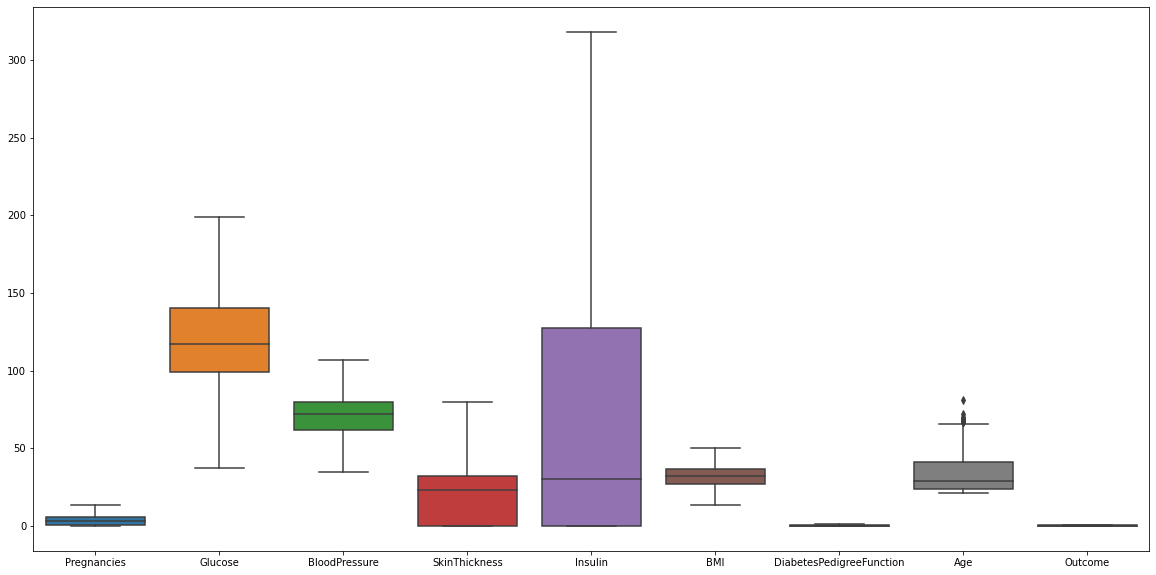

In [228]:
fig=plt.figure(figsize=(20,10))
ax= sns.boxplot(data=df) 

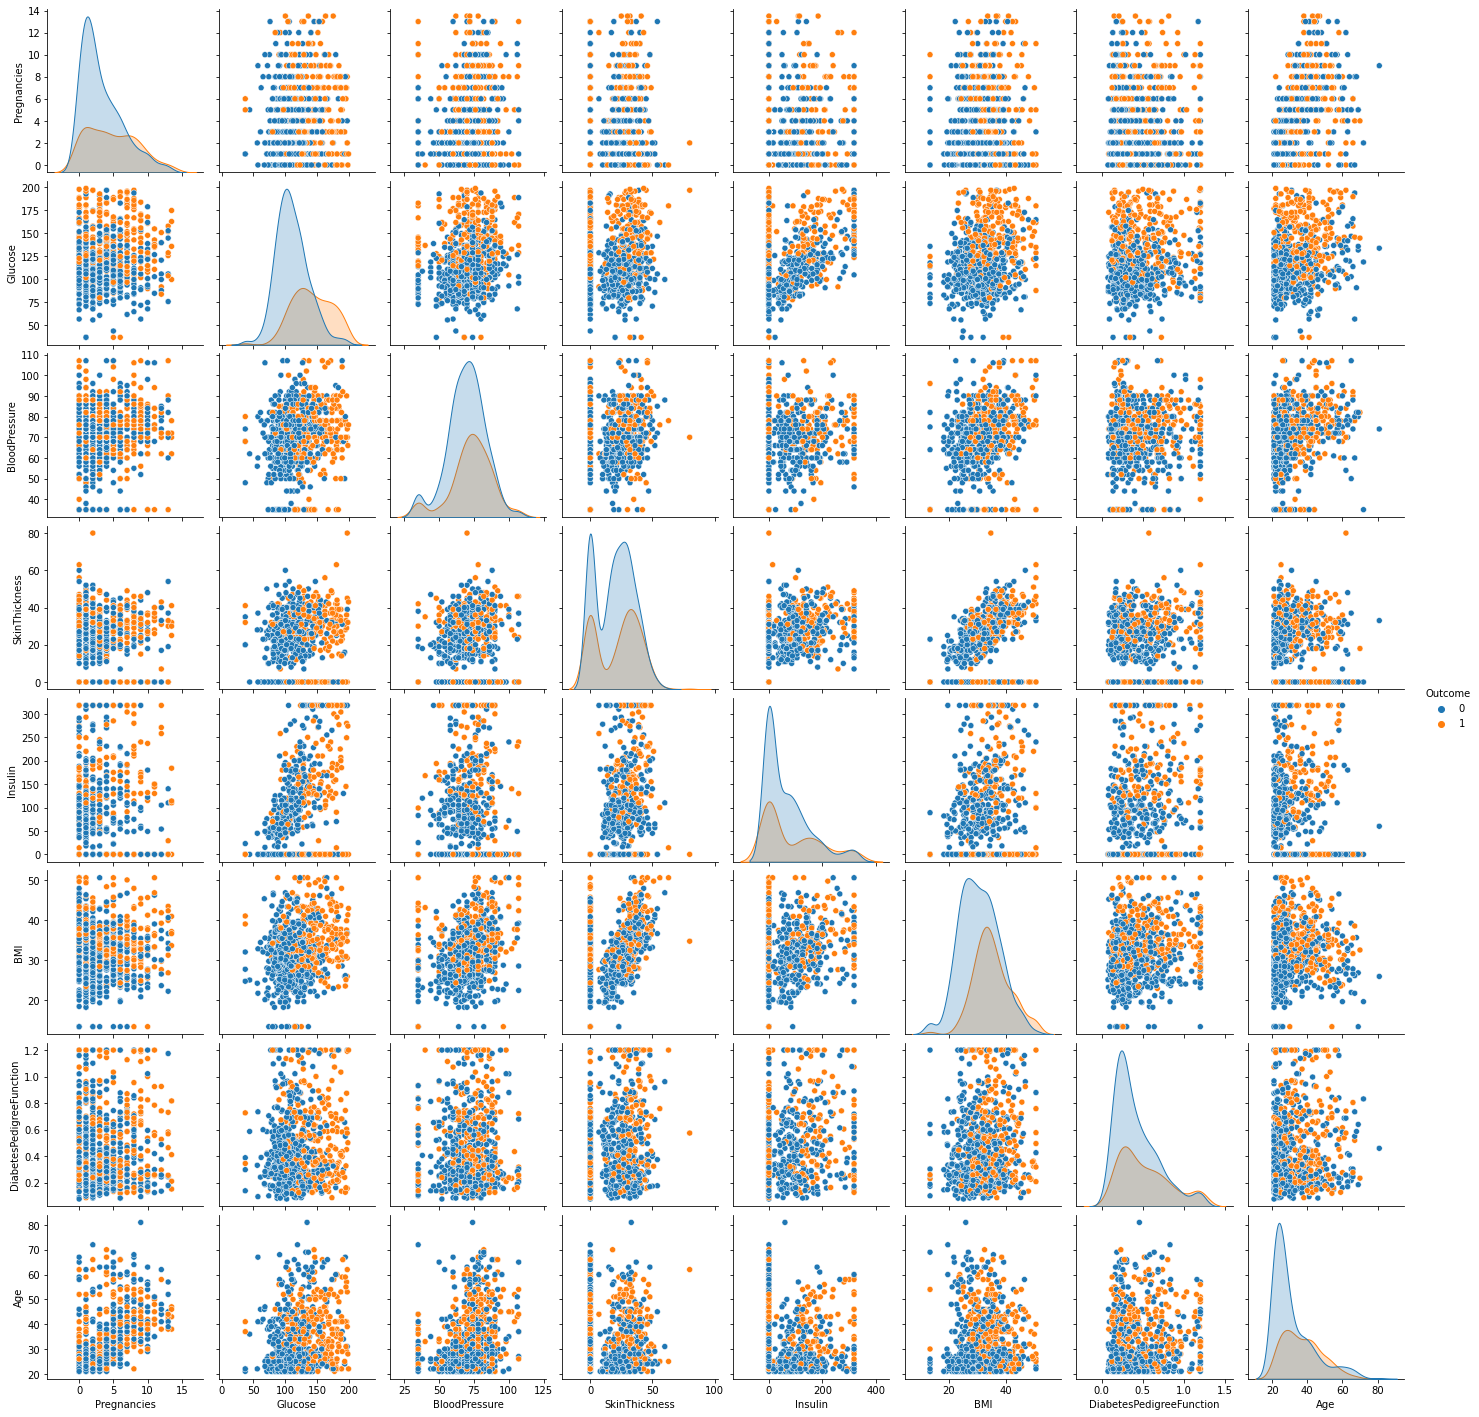

In [229]:
sns.pairplot(df,hue='Outcome')


In [230]:
model=svm.SVC()

In [231]:
x=df.drop(labels='Outcome',axis=1)
y=df.Outcome
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
print(score)

0.8051948051948052


In [232]:
score=0
while score<0.87:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test) #score
print(score)

0.8701298701298701


In [233]:
with open('Model.pkl','wb') as f:
    pickle.dump(model,f)

In [234]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'kernel': 'linear'}
0.7443022790883647
